In [1]:
import pandas as pd

Откройте файл с таблицей Выведите последние 10 строк.
Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы?

In [2]:
df = pd.read_csv('data.csv') # чтение данных из файла data.csv
df.tail(10)                  # вывод на экран последних 10 строк

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [ ]:
''' 
Таблица содержит строку с названиями колонок и 4622 строк с данными, начиная с нулевой. 
В таблице отображены заказы со следующей информацией:
1. Первый столбец - индекс строки
2. order_id - идентификатор заказа
3. quantity - количество товара в заказе
4. item_name - категория товара
5. choice_description - наименование товара
6. item_price - итоговая стоимость товара в заказе
'''

Сколько заказов попало в выборку?
Сколько уникальных категорий товара было куплено? (item_name)

Есть ли в данных пропуски? В каких колонках?   
Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [3]:
print('Количество заказов в выборке:', df['order_id'].nunique())
print('Количество уникальных категорий товара:', df['item_name'].nunique())

Количество заказов в выборке: 1834
Количество уникальных категорий товара: 50


In [4]:
df.isnull().sum() # В колонке choice_description 1246 пропуск

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [5]:
df.info()   # Колонка choice_description имеет тип данных object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [6]:
df['choice_description'] = df['choice_description'].fillna('')# Заполнение пропусков пустой строкой для choice_description 
df.tail(10)  

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,,$2.15
4614,1831,1,Bottled Water,,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


Какая средняя/минимальная/максимальная цена у товара?

In [7]:
import numpy as np
df1 = df
# Добавление новой колонки с удалением символа $ из колонки item_price и деление стоимости товара на количество товара
df1['item_price_for_1_thing'] = pd.to_numeric(df['item_price'].str.strip('$')) / (df['quantity'])  

In [8]:
# минимальная/максимальная/cредняя цена у товара
df1.groupby('choice_description')['item_price_for_1_thing'].agg([np.min, np.max, np.mean]).head(10)

,amin,amax,mean
choice_description,,,
,1.09,4.45,3.002632
"[Adobo-Marinated and Grilled Chicken, Pinto Beans, [Sour Cream, Salsa, Cheese, Cilantro-Lime Rice, Guacamole]]",7.40,7.40,7.400000
"[Adobo-Marinated and Grilled Chicken, [Sour Cream, Cheese, Cilantro-Lime Rice]]",7.40,7.40,7.400000
[Adobo-Marinated and Grilled Chicken],7.40,7.40,7.400000
"[Adobo-Marinated and Grilled Steak, [Sour Cream, Salsa, Cheese, Cilantro-Lime Rice, Guacamole]]",7.40,7.40,7.400000
[Adobo-Marinated and Grilled Steak],7.40,7.40,7.400000
[Apple],3.39,3.39,3.390000
[Blackberry],3.39,3.39,3.390000
"[Braised Barbacoa, Pinto Beans, [Sour Cream, Salsa, Cheese, Cilantro-Lime Rice, Guacamole]]",7.40,7.40,7.400000


Разбейте заказы на три группы: дешевые, средние и дорогие. Порог для групп подберите сами (посмотрите, на около какой суммы чаще берут в каждой группе).

In [9]:
df2 = pd.DataFrame(df1.groupby('order_id')['item_price_for_1_thing'].agg('sum'))

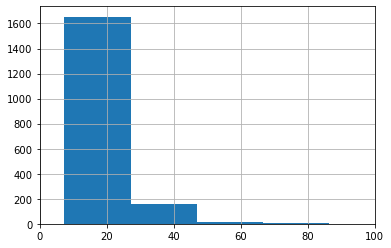

In [10]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
plt.xlim(0, 100)
h = df2['item_price_for_1_thing'].hist()
fig = h.get_figure()

In [11]:
#Дешевые: до 25
#Средние: от 25 до 45
#Дорогие: от 45
df2['price_group'] = ['Low' if x<25 else 'Normal' if 25<=x<45 else 'High' for x in df2['item_price_for_1_thing']]
df2

,item_price_for_1_thing,price_group
order_id,,
1,11.56,Low
2,8.49,Low
3,12.67,Low
4,21.00,Low
5,13.70,Low
...,...,...
1830,23.00,Low
1831,12.90,Low
1832,13.20,Low
